In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load Dataset

In [57]:
data = pd.read_csv(os.path.join(os.getcwd(), 'dataset', 'steam_review_sentiment.csv'))
data.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [58]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 17494
Number of columns: 5


This dataset is from Kaggle. It contains 17,494 rows and 5 columns. The dataset is about the steam game reviews. The columns are the review_id, the title of the video game, the year of the review, the review of the user, and whether the user recommends the game or not.

### 2. Data Preprocessing

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [60]:
data.isnull().sum() # missing some year values

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

The are 178 rows that have missing year values in the dataset. Considering that we have 17,494 instances, I believe that it is safe to remove these rows as it will make the data easier to process and will not greatly reduce the size of the dataset.

In [61]:
data.dropna(inplace=True)
data.isnull().sum()

review_id          0
title              0
year               0
user_review        0
user_suggestion    0
dtype: int64

In [62]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 17316
Number of columns: 5


In [63]:
data.duplicated().sum()

0

In [64]:
all_classes = data['user_suggestion'].unique()

for class_name in all_classes:
    print(f"Percentage of {class_name} class in dataset: {data[data['user_suggestion'] == class_name]['user_suggestion'].size/data['user_suggestion'].size*100:0.2f}%")

Percentage of 1 class in dataset: 57.10%
Percentage of 0 class in dataset: 42.90%


There is not a wide disparity between the label classes.

### 3. Feature Engineering

Get sentimenent score for each review using transformer model that we trained from scratch.

In [65]:
# from inference_model import inference_model

# inference_model(data, 'user_review')

In [66]:
# data.to_csv(os.path.join(os.getcwd(), 'dataset', 'steam_review_sentiment_NN.csv'), index=False)

In [67]:
data = pd.read_csv(os.path.join(os.getcwd(), 'dataset', 'steam_review_sentiment_NN.csv'))

In [68]:
data.head()

,review_id,title,year,user_review,user_suggestion,review_sentiment
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,0.369377
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,0.827403
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,0.953158
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,0.960616
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,0.819643


Right now the game titles are represented as strings. We need to categorize them into number for the model to understand

In [69]:
from sklearn.preprocessing import LabelEncoder


In [70]:
data['title'] = LabelEncoder().fit_transform(data['title'])
data.head()

,review_id,title,year,user_review,user_suggestion,review_sentiment
0,1,33,2016.0,I'm scared and hearing creepy voices. So I'll...,1,0.369377
1,2,33,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,0.827403
2,3,33,2016.0,"A littly iffy on the controls, but once you kn...",1,0.953158
3,4,33,2015.0,"Great game, fun and colorful and all that.A si...",1,0.960616
4,5,33,2015.0,Not many games have the cute tag right next to...,1,0.819643


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17316 entries, 0 to 17315
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         17316 non-null  int64  
 1   title             17316 non-null  int64  
 2   year              17316 non-null  float64
 3   user_review       17316 non-null  object 
 4   user_suggestion   17316 non-null  int64  
 5   review_sentiment  17316 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 811.8+ KB


We also want to experiment with using a CountVectorizer as a feature extractor, to quantify the effectiveness of our transformer model

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=250)
counts = count_vect.fit_transform(data['user_review'])

# Convert counts to a DataFrame
counts_df = pd.DataFrame(counts.toarray(), columns=count_vect.get_feature_names_out())

# Concatenate counts with the original DataFrame
data_with_counts = data.copy()
data_with_counts = pd.concat([data_with_counts, counts_df], axis=1)
data_with_counts.head()

,review_id,title,year,user_review,user_suggestion,review_sentiment,10,able,about,access,...,win,with,without,work,world,worth,would,years,you,your
0,1,33,2016.0,I'm scared and hearing creepy voices. So I'll...,1,0.369377,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,33,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,0.827403,1,0,0,0,...,0,0,0,0,0,0,0,0,4,1
2,3,33,2016.0,"A littly iffy on the controls, but once you kn...",1,0.953158,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
3,4,33,2015.0,"Great game, fun and colorful and all that.A si...",1,0.960616,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,33,2015.0,Not many games have the cute tag right next to...,1,0.819643,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [73]:
data.drop(['user_review', 'review_id'], inplace=True, axis=1) # we do not need this column anymore   
data_with_counts.drop(['user_review', 'review_id'], inplace=True, axis=1)   
data.head()

,title,year,user_suggestion,review_sentiment
0,33,2016.0,1,0.369377
1,33,2016.0,1,0.827403
2,33,2016.0,1,0.953158
3,33,2015.0,1,0.960616
4,33,2015.0,1,0.819643


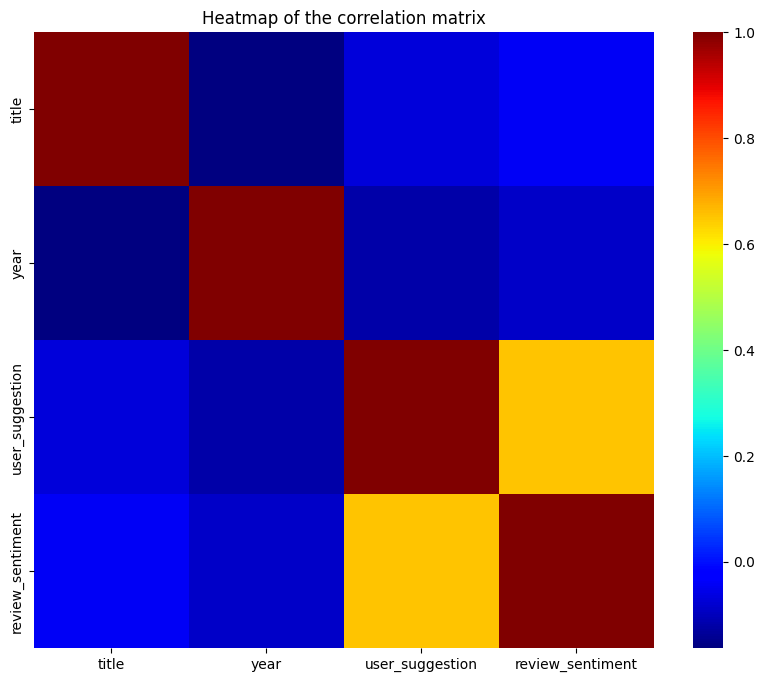

In [74]:
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='jet')
plt.title("Heatmap of the correlation matrix")
plt.show()

# Correlation graph of each column with the class column
# plt.figure(figsize=(10,4))
# sns.barplot(x=data.index, y=data.values, palette='coolwarm')
# plt.xticks(rotation=45)
# plt.title("Correlation graph of each column with the class column")
# plt.show()

We can see that the review sentiment and the user suggestion are correlated.

### 4. Model Selection

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [76]:
X, y = data.drop(['user_suggestion'], axis=1), data['user_suggestion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11081, 3), (3464, 3), (11081,), (3464,))

In [78]:
print(f"Number of rows in train dataset: {X_train.shape[0]}, {X_train.shape[0]/data.shape[0]*100:0.2f}%")
print(f"Number of rows in test dataset: {X_test.shape[0]}, {X_test.shape[0]/data.shape[0]*100:0.2f}%")

Number of rows in train dataset: 11081, 63.99%
Number of rows in test dataset: 3464, 20.00%


In [79]:
X_train.head()

,title,year,review_sentiment
8476,25,2018.0,0.025107
8068,20,2018.0,0.044324
1619,10,2016.0,0.049760
3809,35,2015.0,0.989106
2361,21,2018.0,0.926812


For the first model, we'll try training a random forest classifier on the features extracted from the CountVectorizer

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [81]:
preds = rf.predict(X_test)
print(f"Accuracy: {rf.score(X_test, y_test)*100:0.2f}%")

Accuracy: 82.25%


In [82]:
models_df = pd.DataFrame(columns=[
                                "Model Name",
                                "Notes",
                                "Accuracy (Training)",
                                "Log Loss (Training)",
                                "F1 Score (Training)",
                                "Precision (Training)",
                                "Recall (Training)",
                                "Accuracy (Validation)",
                                "Log Loss (Validation)",
                                "F1 Score (Validation)",
                                "Precision (Validation)",
                                "Recall (Validation)",])
models_df.head()

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)


In [83]:
def add_model_stats(model, model_name, notes, X_train, y_train, X_val, y_val, models_df):
    X_train_predictions = model.predict(X_train)
    X_train_accuracy = accuracy_score(y_train, X_train_predictions)
    print(f"{model_name} validation Accuracy Score on training set: {X_train_accuracy:0.4f}")

    X_val_predictions = model.predict(X_val)
    X_val_accuracy = accuracy_score(y_val, X_val_predictions)
    print(f"{model_name} validation Accuracy Score on validation set: {X_val_accuracy:0.4f}")

    # Get probabilities
    X_train_probabilities = model.predict_proba(X_train)
    X_val_probabilities = model.predict_proba(X_val)

    log_loss_training_set = log_loss(y_train, X_train_probabilities)
    print(f"{model_name} validation Log Loss on validation set: {log_loss_training_set:0.4f}")

    log_loss_validation_set = log_loss(y_val, X_val_probabilities)
    print(f"{model_name} validation Log Loss on validation set: {log_loss_validation_set:0.4f}")

    model_f1_train = f1_score(y_train, X_train_predictions, average='weighted')
    model_precision_train = precision_score(y_train, X_train_predictions, average="weighted")
    model_recall_train = recall_score(y_train, X_train_predictions, average="weighted")

    model_f1_val = f1_score(y_val, X_val_predictions, average='weighted')
    print(f"{model_name} validation F1 Score on validation set: {model_f1_val:0.4f}")
    model_precision_val = precision_score(y_val, X_val_predictions, average="weighted")
    print(f"{model_name} validation Precision Score on validation set: {model_precision_val:0.4f}")
    model_recall_val = recall_score(y_val, X_val_predictions, average="weighted")
    print(f"{model_name} validation Recall Score on validation set: {model_recall_val:0.4f}")

    df_entry = {
            "Model Name": model_name,
            "Notes": notes,
            "Accuracy (Training)": X_train_accuracy,
            "Log Loss (Training)": log_loss_training_set,
            "F1 Score (Training)": model_f1_train,
            "Precision (Training)": model_precision_train,
            "Recall (Training)": model_recall_train,
            "Accuracy (Validation)": X_val_accuracy,
            "Log Loss (Validation)": log_loss_validation_set,
            "F1 Score (Validation)": model_f1_val,
            "Precision (Validation)": model_precision_val,
            "Recall (Validation)": model_recall_val}

    # As of Pandas 2.0 append is deprecated and we have to use concat now, not a fan
    # See this post https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append
    models_df = pd.concat([models_df, pd.DataFrame([df_entry])], ignore_index=True)
    return models_df

In [84]:
logistic_model = LogisticRegression(random_state=42, max_iter=10000)
svc_model_linear = SVC(random_state=42, kernel="linear", probability=True, gamma="auto")
svc_model_rbf = SVC(random_state=42, kernel="rbf", probability=True, gamma="auto")
random_forest_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200, max_depth=4, criterion="entropy")
xgb_classifier = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=200, gamma=0.1, learning_rate=0.1)

models = [logistic_model, svc_model_linear, svc_model_rbf, random_forest_classifier, xgb_classifier]
names = ["Logistic Regression", "SVC Linear", "SVC RBF", "Random Forest", "XGBoost"]
models_df = pd.DataFrame()

In [85]:
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    models_df = add_model_stats(model, names[i], "Processed Data", X_train, y_train, X_val, y_val, models_df)
models_df.head()

Logistic Regression validation Accuracy Score on training set: 0.8133
Logistic Regression validation Accuracy Score on validation set: 0.8058
Logistic Regression validation Log Loss on validation set: 0.4381
Logistic Regression validation Log Loss on validation set: 0.4421
Logistic Regression validation F1 Score on validation set: 0.8072
Logistic Regression validation Precision Score on validation set: 0.8209
Logistic Regression validation Recall Score on validation set: 0.8058
SVC Linear validation Accuracy Score on training set: 0.8199
SVC Linear validation Accuracy Score on validation set: 0.8210
SVC Linear validation Log Loss on validation set: 0.7629
SVC Linear validation Log Loss on validation set: 0.7773
SVC Linear validation F1 Score on validation set: 0.8213
SVC Linear validation Precision Score on validation set: 0.8219
SVC Linear validation Recall Score on validation set: 0.8210
SVC RBF validation Accuracy Score on training set: 0.8569
SVC RBF validation Accuracy Score on va

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)
0,Logistic Regression,Processed Data,0.813284,0.438126,0.814161,0.823962,0.813284,0.805846,0.442088,0.807156,0.820949,0.805846
1,SVC Linear,Processed Data,0.819872,0.762855,0.819802,0.819745,0.819872,0.821003,0.777349,0.821326,0.821871,0.821003
2,SVC RBF,Processed Data,0.856872,0.352889,0.857179,0.858026,0.856872,0.842656,0.383179,0.843109,0.844208,0.842656
3,Random Forest,Processed Data,0.834582,0.409097,0.835039,0.836468,0.834582,0.833995,0.413718,0.834797,0.837954,0.833995
4,XGBoost,Processed Data,0.886111,0.263669,0.886253,0.886558,0.886111,0.855648,0.336662,0.855831,0.856124,0.855648


In [86]:
models_df.head()

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)
0,Logistic Regression,Processed Data,0.813284,0.438126,0.814161,0.823962,0.813284,0.805846,0.442088,0.807156,0.820949,0.805846
1,SVC Linear,Processed Data,0.819872,0.762855,0.819802,0.819745,0.819872,0.821003,0.777349,0.821326,0.821871,0.821003
2,SVC RBF,Processed Data,0.856872,0.352889,0.857179,0.858026,0.856872,0.842656,0.383179,0.843109,0.844208,0.842656
3,Random Forest,Processed Data,0.834582,0.409097,0.835039,0.836468,0.834582,0.833995,0.413718,0.834797,0.837954,0.833995
4,XGBoost,Processed Data,0.886111,0.263669,0.886253,0.886558,0.886111,0.855648,0.336662,0.855831,0.856124,0.855648


Now we'll train the model on the CountVectorizer features instead of the transformer sentiment

In [87]:
X, y = data_with_counts.drop(['user_suggestion', 'review_sentiment'], axis=1), data['user_suggestion']

X_train_with_counts, X_test_with_counts, y_train_with_counts, y_test_with_counts = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_with_counts, X_val_with_counts, y_train_with_counts, y_val_with_counts = train_test_split(X_train_with_counts, y_train_with_counts, test_size=0.2, random_state=42)

In [167]:
logistic_model_counts = LogisticRegression(random_state=42, max_iter=10000)
random_forest_classifier_counts = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200, max_depth=4, criterion="entropy")

models = [logistic_model_counts, random_forest_classifier_counts]
names = ["Logistic Regression (With Counts)", "Random Forest (With Counts)"]

models_df = pd.DataFrame() # reset the dataframe

for i, model in enumerate(models):
    model.fit(X_train_with_counts, y_train_with_counts)
    models_df = add_model_stats(model, names[i], "With Data Counts", X_train_with_counts, y_train_with_counts, X_val_with_counts, y_val_with_counts, models_df)
models_df.head()

Logistic Regression (With Counts) validation Accuracy Score on training set: 0.7800
Logistic Regression (With Counts) validation Accuracy Score on validation set: 0.7661
Logistic Regression (With Counts) validation Log Loss on validation set: 0.4731
Logistic Regression (With Counts) validation Log Loss on validation set: 0.5047
Logistic Regression (With Counts) validation F1 Score on validation set: 0.7652
Logistic Regression (With Counts) validation Precision Score on validation set: 0.7649
Logistic Regression (With Counts) validation Recall Score on validation set: 0.7661
Random Forest (With Counts) validation Accuracy Score on training set: 0.6602
Random Forest (With Counts) validation Accuracy Score on validation set: 0.6727
Random Forest (With Counts) validation Log Loss on validation set: 0.6294
Random Forest (With Counts) validation Log Loss on validation set: 0.6274
Random Forest (With Counts) validation F1 Score on validation set: 0.6176
Random Forest (With Counts) validation 

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)
0,Logistic Regression (With Counts),With Data Counts,0.779984,0.473144,0.778177,0.779463,0.779984,0.766149,0.504715,0.765175,0.764933,0.766149
1,Random Forest (With Counts),With Data Counts,0.660229,0.629423,0.600358,0.740071,0.660229,0.672681,0.627409,0.617637,0.735116,0.672681


In [168]:
models_df.head()

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)
0,Logistic Regression (With Counts),With Data Counts,0.779984,0.473144,0.778177,0.779463,0.779984,0.766149,0.504715,0.765175,0.764933,0.766149
1,Random Forest (With Counts),With Data Counts,0.660229,0.629423,0.600358,0.740071,0.660229,0.672681,0.627409,0.617637,0.735116,0.672681


### 5. Hyperparameter Tuning

We are only going to tune the hyperparameters for one model, and that is going to be XGBoost. We will use RandomizedSearchCV to find the best hyperparameters for the model.

In [96]:
xgb = XGBClassifier()

params = {
    'n_estimators': np.arange(100, 250, 50),
    'learning_rate': [0.01, 0.1],
    'max_depth': np.arange(4, 8, 2),
    'gamma': [0.1, 0.2]
}

In [107]:
from sklearn.model_selection import GridSearchCV

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring='f1',  # or another scoring metric
    n_jobs=-1,  # Use all available cores
    cv=10,  # 10-fold cross-validation
    verbose=1,
)

In [108]:
grid_search_xgb.fit(X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2], 'learning_rate': [0.01, 0.1],
                         'max_depth': array([4, 6]),
                         'n_estimators': array([100, 150, 200])},
             scoring='f1', verbose=1)

In [114]:
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Score: 0.6318435911072795


### 6. Visualization

Confusion Matrices, ROC Curves, and Precision-Recall Curves

Functions:
- confusion_matrix
- roc_curve
- precision_recall_curve

Models:
- Logistic Regression
- Random Forest
- SVM Linear
- SVM RBF
- XGB

In [164]:
def plot_confusion_matrices(models, y_true):
    """
    Plot a confusion matrix using true and predicted labels.
    
    Parameters:
    - y_true: Actual labels
    - y_pred: Predicted labels
    - class_names: Optional list of class names for labeling the matrix
    """
    class_names = ['Recommended', 'Not Recommended']
    num_models = len(models)
    ncols = 3
    nrows = (num_models + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    for i, (title, ax) in enumerate(zip(models.keys(), axs.flatten())):
        cm = confusion_matrix(y_true, models[title].predict(X_test))

        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

In [154]:
from sklearn.metrics import roc_curve, auc

def plot_binary_roc_curves(models, X_test, y_test):
    """
    Plot ROC curve for binary classification for different models in separate columns.

    Parameters:
    - models: A dictionary of models with model names as keys.
    - X_test: Test features.
    - y_test: True binary labels.
    """
    num_models = len(models)
    plt.figure(figsize=(5 * num_models, 5))  # Adjust figure size based on the number of models

    for i, (model_name, model) in enumerate(models.items(), 1):
        # Compute predicted probabilities and ROC curve data
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Create a subplot in a grid with 1 row and as many columns as there are models
        plt.subplot(1, num_models, i)
        plt.plot(fpr, tpr, label=f'{model_name} - AUC: {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

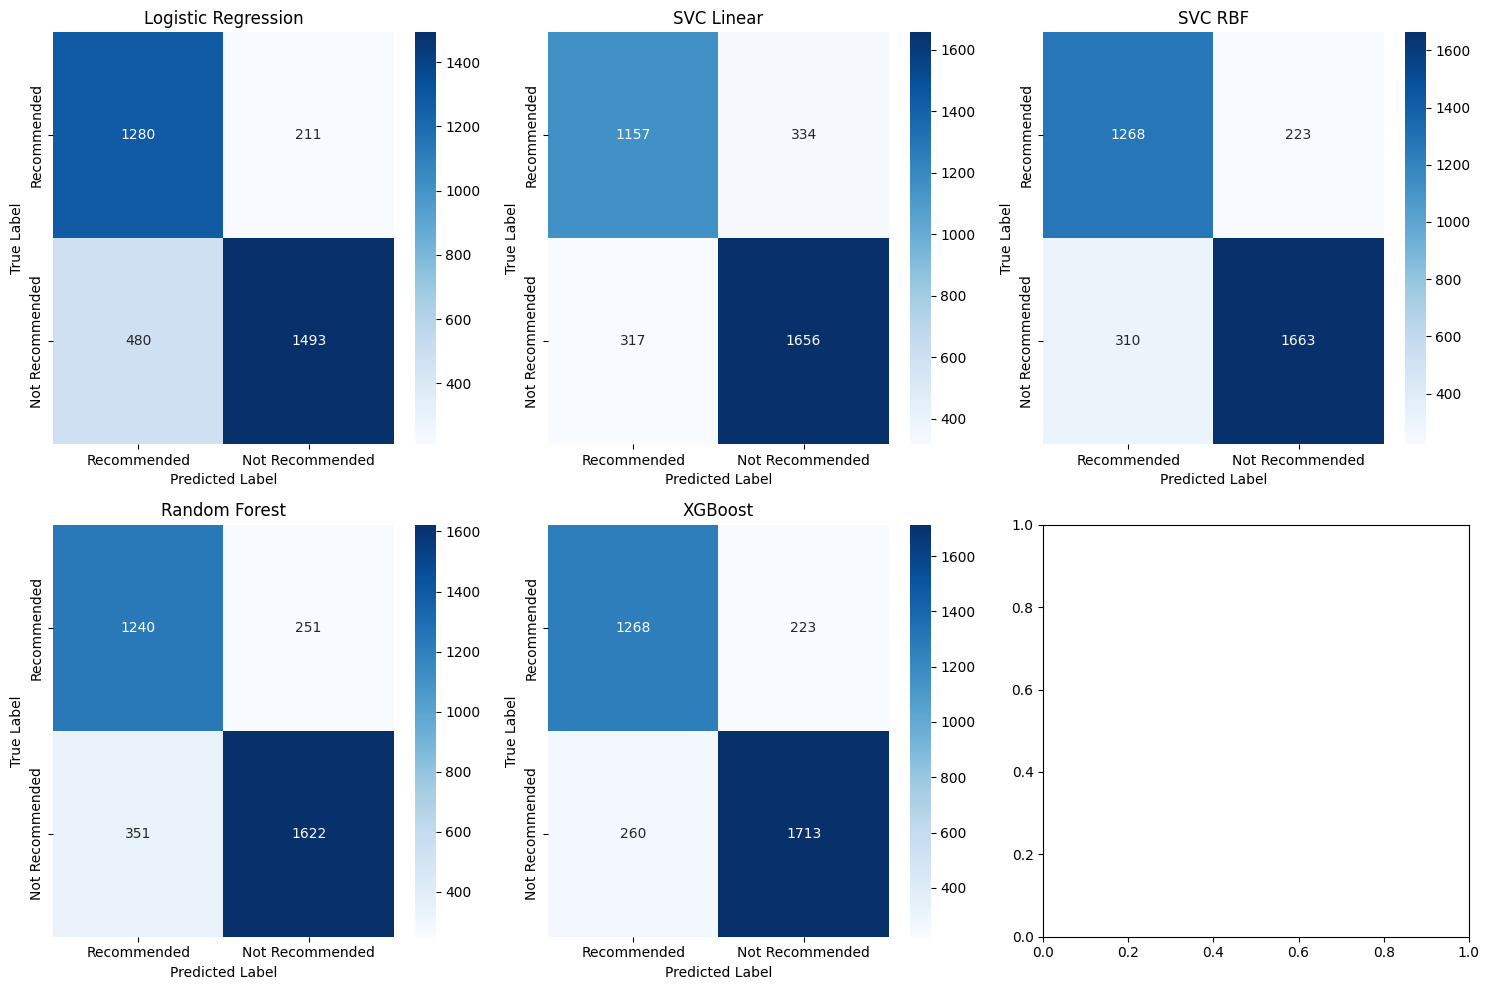

In [165]:
y_pred_logistic = logistic_model.predict(X_val)
y_pred_svc_linear = svc_model_linear.predict(X_val)
y_pred_svc_rbf = svc_model_rbf.predict(X_val)
y_pred_random_forest = random_forest_classifier.predict(X_val)
y_pred_xgb = xgb_classifier.predict(X_val)

models = {
    "Logistic Regression": logistic_model,
    "SVC Linear": svc_model_linear,
    "SVC RBF": svc_model_rbf,
    "Random Forest": random_forest_classifier,
    "XGBoost": xgb_classifier
}

model_predictions = {
    "Logistic Regression": y_pred_logistic,
    "SVC Linear": y_pred_svc_linear,
    "SVC RBF": y_pred_svc_rbf,
    "Random Forest": y_pred_random_forest,
    "XGBoost": y_pred_xgb
}

plot_confusion_matrices(models, y_test)

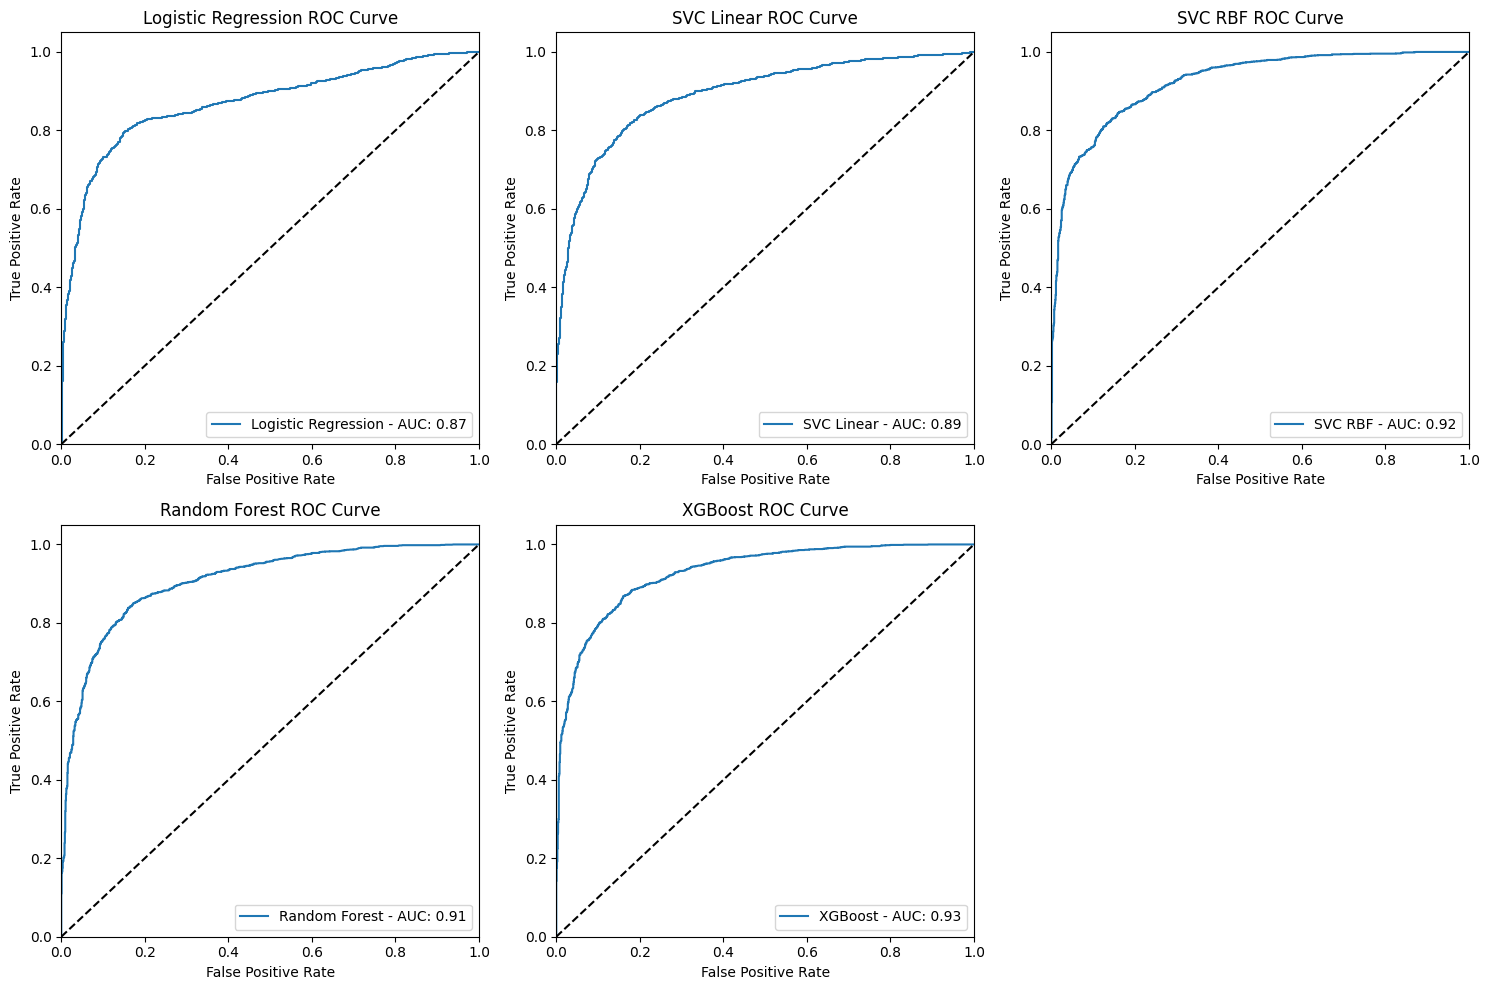

In [156]:
plot_binary_roc_curves(models, X_val, y_val)

In [151]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_binary_precision_recall_curve(models, X_val, y_true):
    """
    Plot PR curve for binary classification models.
    
    Parameters:
    - models: Dictionary of model names and corresponding models
    - X_val: Validation data
    - y_true: True labels
    """

    num_models = len(models)
    ncols = 3
    nrows = (num_models + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    for i, (title, ax) in enumerate(zip(models.keys(), axs.flatten())):
        # Ensure y_scores is a NumPy array
        preds = models[title].predict_proba(X_val)[:, 1]  # Assuming binary classification, adjust accordingly
        y_scores_array = preds

        precision, recall, _ = precision_recall_curve(y_true, y_scores_array)
        average_precision = average_precision_score(y_true, y_scores_array)

        ax.plot(recall, precision, lw=2, label=f'PR curve (area = {average_precision:0.2f})')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title(f'{title} Precision-Recall Curve')
        ax.legend(loc="lower left")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

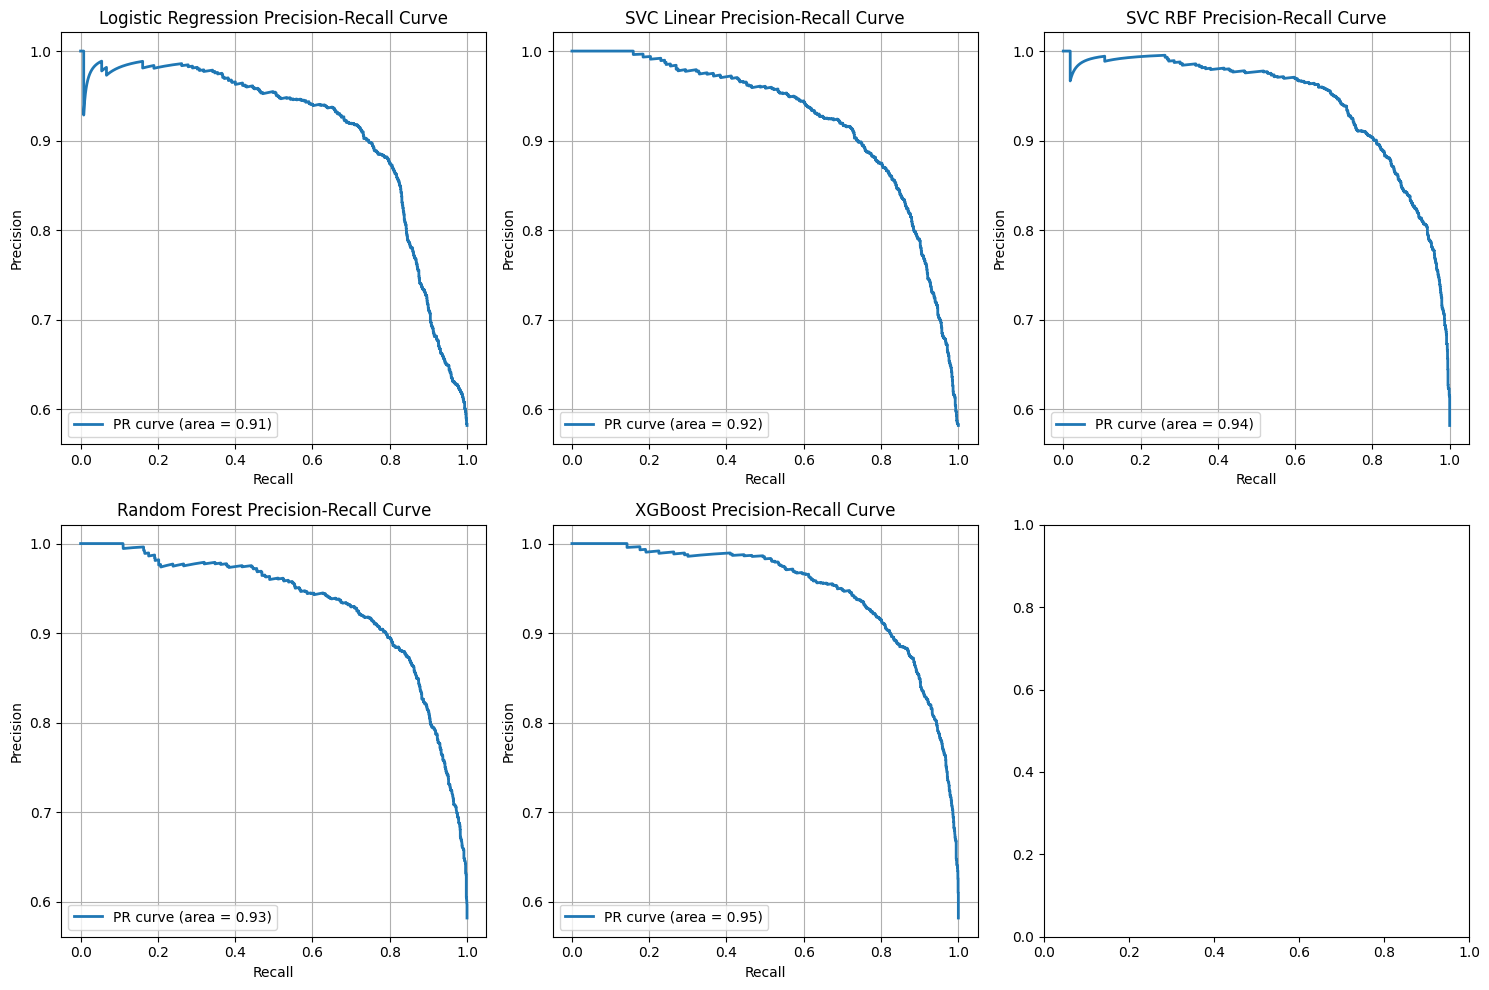

In [155]:
plot_binary_precision_recall_curve(models, X_val, y_val)


In [166]:
models_df.head()

,Model Name,Notes,Accuracy (Training),Log Loss (Training),F1 Score (Training),Precision (Training),Recall (Training),Accuracy (Validation),Log Loss (Validation),F1 Score (Validation),Precision (Validation),Recall (Validation)
0,Logistic Regression,Processed Data,0.813284,0.438126,0.814161,0.823962,0.813284,0.805846,0.442088,0.807156,0.820949,0.805846
1,SVC Linear,Processed Data,0.819872,0.762855,0.819802,0.819745,0.819872,0.821003,0.777349,0.821326,0.821871,0.821003
2,SVC RBF,Processed Data,0.856872,0.352889,0.857179,0.858026,0.856872,0.842656,0.383179,0.843109,0.844208,0.842656
3,Random Forest,Processed Data,0.834582,0.409097,0.835039,0.836468,0.834582,0.833995,0.413718,0.834797,0.837954,0.833995
4,XGBoost,Processed Data,0.886111,0.263669,0.886253,0.886558,0.886111,0.855648,0.336662,0.855831,0.856124,0.855648


### 7. Insights and Analysis

Analysis: All of the models performed well, with the XGB model performing the best. The models were able to use the sentimenent score to predict whether the user would recommend a certain game or not. The worst performing model was the logistic regression model. It had the lowest accuracy (80.58%) and f1_score (0.807156) on the validation set. The best performing model was the XGB model. It had the highest accuracy (0.855648) and f1_score (). The XGB model was able to predict whether the user would recommend a certain game or not with 95% accuracy. The XGB model was also able to predict whether the user would recommend a certain game or not with 95% precision. The XGB model was also able to predict whether the user would recommend a certain game or not with 95% recall.

Additionally, the models trained on the VectorCount features performed significantly worse than those with the transformer sentiment features. Logistic regression scored 76% vs. 80% on the validation data, and the random forest model scored 67% vs. 83% with the transformer sentiment features

### 8. Validation